In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os

In [71]:
image_size=256
batch_size=32
channels=3
epochs=3

In [16]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\lab_dsp\PlantVillage",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 2475 files belonging to 2 classes.


In [17]:
class_names=dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [22]:
import numpy as np
import pywt
import cv2    
def get_wd_img(image_path,mode='haar', level=1):
    img=cv2.imread(image_path)
    
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

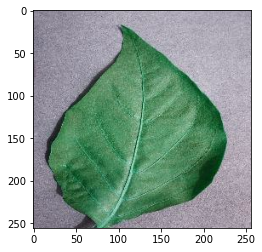

In [23]:
original_image=cv2.imread("C:\lab_dsp\PlantVillage\imgg.jpg")
plt.imshow(original_image)

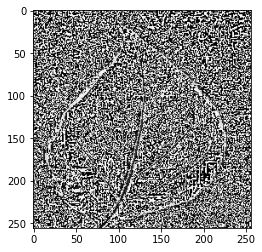

In [53]:
wd_img=get_wd_img('C:\lab_dsp\PlantVillage\imgg.jpg',mode='haar', level=2)
plt.imshow(wd_img,cmap='gray')

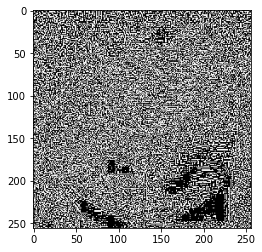

In [57]:
wd_img=get_wd_img('C:\lab_dsp\PlantVillage\imgg_bacteria.jpg',mode='haar', level=1)
plt.imshow(wd_img,cmap='gray')

In [32]:
path_to_data="C:\lab_dsp\PlantVillage"
path_to_wd_data="C:\lab_dsp\PlantVillage\wd"

In [33]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [34]:
img_dirs

['C:\\lab_dsp\\PlantVillage\\Pepper__bell___Bacterial_spot',
 'C:\\lab_dsp\\PlantVillage\\Pepper__bell___healthy']

In [35]:
import shutil
if os.path.exists(path_to_wd_data):
    shutil.rmtree(path_to_wd_data)

os.mkdir(path_to_wd_data)

In [36]:
wd_image_dirs=[]
plant_file_names_dict={}

for img_dir in img_dirs:
    count=1
    plant_name=img_dir.split('\\')[-1]
    print(plant_name)
    plant_file_names_dict[plant_name]=[]
    for entry in os.scandir(img_dir):
        wd_img=get_wd_img(entry.path,mode='haar',level=1)
        if wd_img is not None:
            wd_folder=path_to_wd_data+plant_name
            if not os.path.exists(wd_folder):
                os.makedirs(wd_folder)
                wd_image_dirs.append(wd_folder)
                print("generating wd images in folder",wd_folder)
                
                
            wd_file_name=plant_name+str(count)+".png"
            wd_file_path=wd_folder+"/"+wd_file_name
            
            cv2.imwrite(wd_file_path,wd_img)
            plant_file_names_dict[plant_name].append(wd_file_path)
            count=count+1

Pepper__bell___Bacterial_spot
generating wd images in folder C:\lab_dsp\PlantVillage\wdPepper__bell___Bacterial_spot
Pepper__bell___healthy
generating wd images in folder C:\lab_dsp\PlantVillage\wdPepper__bell___healthy


In [37]:
plant_file_names_dict

{'Pepper__bell___Bacterial_spot': ['C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot1.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot2.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot3.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot4.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot5.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot6.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot7.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot8.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell___Bacterial_spot9.png',
  'C:\\lab_dsp\\PlantVillage\\wdPepper__bell___Bacterial_spot/Pepper__bell__

In [38]:
class_dict={}
count=0
for plant_name in plant_file_names_dict.keys():
    class_dict[plant_name]=count
    count+=1
class_dict

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}

In [73]:
new_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\lab_dsp\PlantVillage\wd",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 2475 files belonging to 2 classes.


In [74]:
class_names=dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [75]:
len(new_dataset)

78

In [77]:
def partion_of_dataset(ds,train_percent=0.8,val_percent=0.1,test_percent=0.1,shuffle=True,shuffle_size=10000):
    
    dataset_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_percent*dataset_size)
    val_size=int(val_percent*dataset_size)
    
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [78]:
train_ds,val_ds,test_ds=partion_of_dataset(dataset)

In [79]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [80]:
rescale_and_resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.Resizing(image_size,image_size),
])

In [81]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 2

model = models.Sequential([
    rescale_and_resize,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (32, 60, 60, 64)         

In [83]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [84]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=3,
)

Epoch 1/3
62/62 [==============================] - 407s 6s/step - loss: 0.6077 - accuracy: 0.6480 - val_loss: 0.9407 - val_accuracy: 0.6607
Epoch 2/3
62/62 [==============================] - 191s 3s/step - loss: 0.2777 - accuracy: 0.8976 - val_loss: 0.2358 - val_accuracy: 0.9018
Epoch 3/3
62/62 [==============================] - 181s 3s/step - loss: 0.1139 - accuracy: 0.9659 - val_loss: 0.0451 - val_accuracy: 0.9911


In [85]:
scores=model.evaluate(test_ds)

9/9 [==============================] - 54s 846ms/step - loss: 0.0859 - accuracy: 0.9826


In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

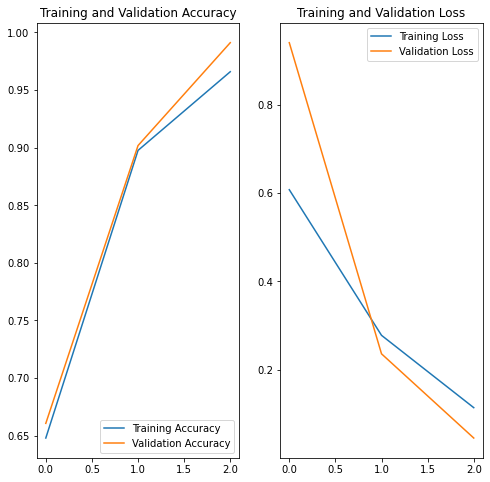

In [87]:
EPOCHS = 3

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___Bacterial_spot
predicted label: Pepper__bell___Bacterial_spot


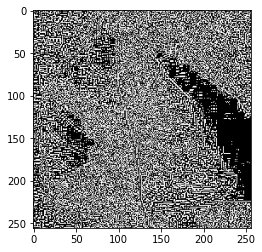

In [88]:
import numpy as np


for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[5].numpy().astype('uint8')
    first_label = (labels_batch[5]).numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    